Performing PCA with Sklearn 

In [1]:
#Import statements 
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler 

import random 

random.seed(10)
np.random.seed(10)
sns.set_theme()

In [2]:
def plot_data_and_axis(data, eigenvectors=None, axis_min=None, axis_max=None, figsize=None):
    """
    This function plots data in a 3D coordinate system.
    It also plots coordinate system axis or arbitrary set of vectors.
    
    :param data: numpy dataset with 3 features
    :param eigenvectors: transposed eigenvector matrix
    :param axi_min: min value for each axis on the plot
    :param axis_max: max value for each axis on the plot
    """
    
    #CReate  3D figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    #Plot the data 
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.2)
    
    #Set axis labels 
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    #Set minimum and maximum value for axis
    if axis_min and axis_max:
        ax.set_xlim(axis_min, axis_max)
        ax.set_ylim(axis_min, axis_max)
        ax.set_zlim(axis_min, axis_max)
    
    ax.view_init(elev=20, azim=-35, roll=0)
    
    #Choose which axis will be plotted (arrow tips)
    if eigenvectors is not None:
        plot_vectors = eigenvectors
    else:
        plot_vectors = [
            [1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ]
        
    #Always set orogin at [0, 0, 0] (arrow starting point)
    origin = [0, 0, 0]
    
    #Iterate over coordinate system arrows (three of them)
    for i, component in enumerate(plot_vectors):
        
        #Plot arrow
        ax.quiver(
            origin[0],
            origin[1],
            origin[2],
            component[0],
            component[1],
            component[2],
            color=['r', 'g', 'b'][i],
            lw=2
        )
        
    plt.show()

In [3]:
#Create 2D normaly distributed data 
mean = np.array([0, 0])
cov = np.array([[1, 0.5], [0.5, 1]])

#Create artificial dataset 
x_y_data = np.random.multivariate_normal(mean, cov, 500) 
z_col = 1.5*x_y_data[:, 1]

#Merge z col with x and y
np_data_3D = np.column_stack([x_y_data, z_col])

#Create datframe in order to display data 
df_3D = pd.DataFrame(np_data_3D, columns=['x', 'y', 'z'])
df_3D.head()


,x,y,z
0,-1.510827,-0.795548,-1.193322
1,1.342548,1.334164,2.001246
2,-0.178050,-0.898136,-1.347203
3,-0.284214,-0.175666,-0.263498
4,0.083584,-0.091017,-0.136525


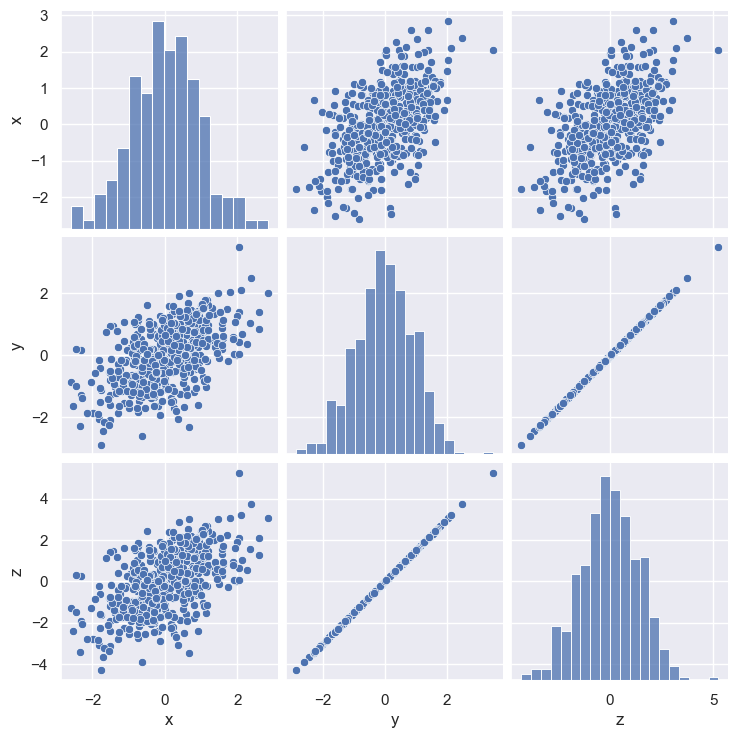

In [4]:
#Plotting the data 
sns.pairplot(df_3D)

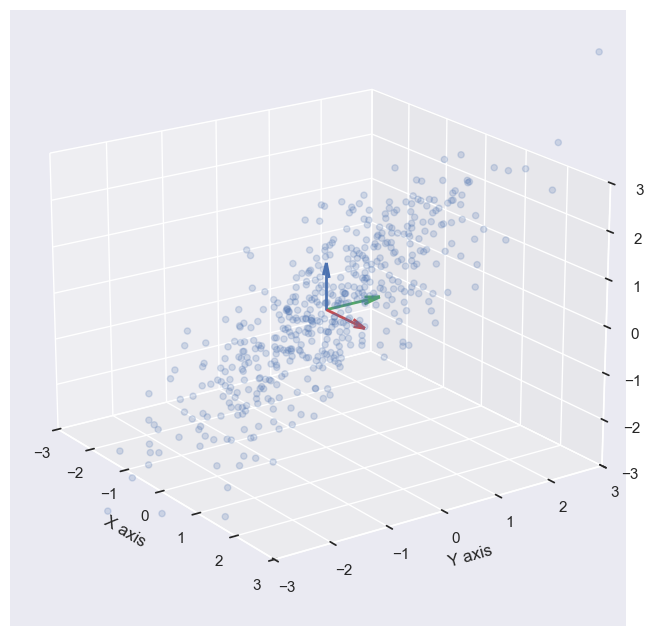

In [5]:
#Plot the data and original coordinate system 
plot_data_and_axis(data=np_data_3D,
                   axis_min=-3,
                   axis_max=3,
                   figsize=(8,8))

In [6]:
#Calculate covariance matrix
cov_mtx = df_3D.cov().to_numpy()

cov_mtx

array([[0.90523183, 0.4721996 , 0.7082994 ],
       [0.4721996 , 0.88894324, 1.33341486],
       [0.7082994 , 1.33341486, 2.00012229]])

In [7]:
#Getting eigenvectors and eigenvalues 
eigenvalues, eigenvectors = np.linalg.eig(cov_mtx)

In [8]:
eigenvalues

array([ 5.90029887e-01,  3.20426748e+00, -1.89085799e-16])

In [9]:
eigenvectors

array([[-9.37778614e-01,  3.47233740e-01, -6.49583220e-17],
       [ 1.92610624e-01,  5.20185981e-01, -8.32050294e-01],
       [ 2.88915936e-01,  7.80278972e-01,  5.54700196e-01]])

In [10]:
np.set_printoptions(suppress=True)
eigenvalues / np.sum(eigenvalues)*100

array([15.55043872, 84.44956128, -0.        ])

In [11]:
eigenvectors

array([[-0.93777861,  0.34723374, -0.        ],
       [ 0.19261062,  0.52018598, -0.83205029],
       [ 0.28891594,  0.78027897,  0.5547002 ]])

In [12]:
sort_idx = np.flip(np.argsort(eigenvalues))
sort_idx

array([1, 0, 2])

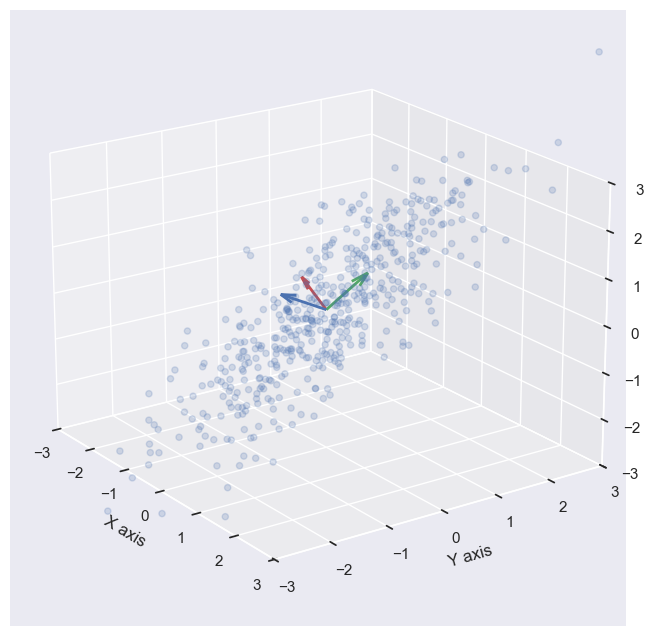

In [13]:
#Plot the data and original coordinate system 
plot_data_and_axis(data=np_data_3D,
                   eigenvectors=eigenvectors.T,
                   axis_min=-3,
                   axis_max=3,
                   figsize=(8,8))                                                                         

In [14]:
#TRansform data to 2D
transformation_matrix = eigenvectors[:, :-1].T 
transformation_matrix

array([[-0.93777861,  0.19261062,  0.28891594],
       [ 0.34723374,  0.52018598,  0.78027897]])

In [15]:
transformed_data = transformation_matrix @ df_3D.to_numpy().T 
transformed_data

array([[ 0.91882057, -0.42384664, -0.3952475 ,  0.15656596, -0.13535791,
         1.05755918,  0.54339997,  0.40977997, -0.20124611, -0.44342248,
        -1.89714002,  1.93660669,  1.61121339,  1.11984003,  0.40621024,
        -0.50167601, -0.33645256,  0.50579328, -0.15592316, -0.23303881,
        -0.09606349, -0.63627105, -0.38356135,  0.15250473,  0.03733825,
         0.21904243,  0.40791826,  0.38659495,  1.36396595, -0.31349821,
        -0.4549868 , -0.24080843, -0.43575159, -0.82665085, -0.19319842,
         0.44660462,  0.71506959,  2.0144012 ,  0.07795684, -0.90615675,
         1.90025375, -0.67539282, -1.68452675,  0.29436096, -1.50071345,
         0.49030958, -0.6061726 ,  0.91022204, -0.06012866, -1.30488951,
        -1.45968442,  0.11808455, -0.35184295,  0.58327665, -0.42469157,
        -0.28901519,  0.07113044, -0.35725486, -0.00821982, -1.19180142,
        -1.18718659,  2.26139439,  0.64421587,  0.40652731,  0.96955985,
        -0.94526582,  0.07257457, -0.50441816,  0.3

In [16]:
tranformed_df = pd.DataFrame(transformed_data.T, columns=['PC1', 'PC2'])
tranformed_df

,PC1,PC2
0,0.918821,-1.869568
1,-0.423847,2.721721
2,-0.395247,-1.580217
3,0.156566,-0.395670
4,-0.135358,-0.124850
...,...,...
495,-1.375463,-1.964616
496,-0.037661,0.649572
497,-0.836393,-0.398315
498,1.036854,1.553311


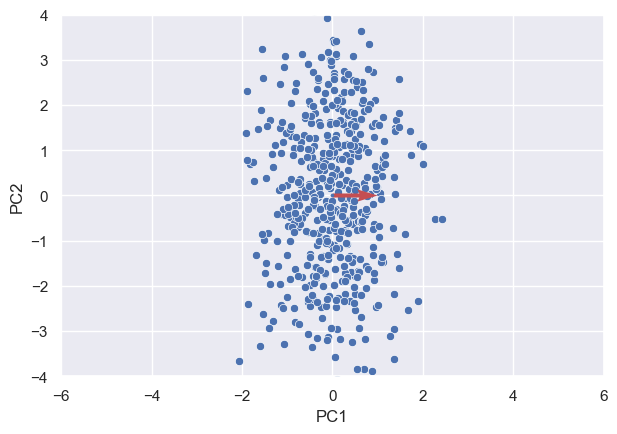

In [17]:
#Plot reduce data 
plt.figure(figsize=(7, 7))

sns.scatterplot(tranformed_df, x='PC1', y='PC2')


plt.xlim([-6, 6])
plt.ylim([-4, 4])


plt.quiver(
    0, 0,
    1,
    0,
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 Vector'
)
plt.quiver(
    0, 0,
    0,
    0,
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label='PC2 Vector'
)

plt.gca().set_aspect('equal', adjustable='box')
#plt.legend()
#plt.title('PC1 and PC2 in original coordinates system')

Doing PCA with sklearn

In [18]:
from sklearn.decomposition import PCA 


In [19]:
pca = PCA(svd_solver='full')
pca

PCA(svd_solver='full')

In [20]:
pca = pca.fit(df_3D)

In [21]:
pca

PCA(svd_solver='full')

In [22]:
print('sklearn pca {}'.format(pca.explained_variance_ratio_*100))
print('Our pca {}'.format(eigenvalues / np.sum(eigenvalues)*100))

sklearn pca [84.44956128 15.55043872  0.        ]
Our pca [15.55043872 84.44956128 -0.        ]


In [23]:
pca.explained_variance_ratio_ == (eigenvalues / np.sum(eigenvalues))

array([False, False, False])

In [26]:
print('sklearn transformation matrix \n {}'.format(pca.components_.T))
print("--------------------------------------------------------")
print(' ')
print('sklearn transformation matrix \n {}'.format(eigenvectors.T))

sklearn transformation matrix 
 [[ 0.34723374  0.93777861 -0.        ]
 [ 0.52018598 -0.19261062  0.83205029]
 [ 0.78027897 -0.28891594 -0.5547002 ]]
--------------------------------------------------------
 
sklearn transformation matrix 
 [[-0.93777861  0.19261062  0.28891594]
 [ 0.34723374  0.52018598  0.78027897]
 [-0.         -0.83205029  0.5547002 ]]


In [27]:
pca.components_ = pca.components_[:-1, :]

In [28]:
pca_transform_data = pca.transform(df_3D)
pca_transform_data

array([[-1.85013743, -0.94155748],
       [ 2.74115163,  0.40110972],
       [-1.56078668,  0.37251058],
       [-0.37623944, -0.17930287],
       [-0.10541984,  0.11262099],
       [ 0.06327962, -1.08029609],
       [ 2.41327364, -0.56613689],
       [-0.08506836, -0.43251688],
       [ 2.11609753,  0.1785092 ],
       [-3.325799  ,  0.42068557],
       [ 2.33876623,  1.87440311],
       [ 1.15181193, -1.95934361],
       [-0.84020638, -1.63395031],
       [ 0.78346337, -1.14257695],
       [ 0.91001421, -0.42894715],
       [ 0.12223397,  0.4789391 ],
       [-0.53459366,  0.31371565],
       [-2.15880125, -0.5285302 ],
       [-0.91365097,  0.13318625],
       [-2.68966994,  0.2103019 ],
       [-1.38143495,  0.07332657],
       [ 1.34867996,  0.61353414],
       [ 1.29652252,  0.36082444],
       [ 0.8276315 , -0.17524164],
       [-1.07698239, -0.06007516],
       [ 0.25932875, -0.24177934],
       [ 1.44788006, -0.43065517],
       [-1.33020235, -0.40933186],
       [-3.59054615,

In [29]:
pca_transfomed_df = pd.DataFrame(pca_transform_data, columns=['PC1', 'PC2'])
pca_transfomed_df

,PC1,PC2
0,-1.850137,-0.941557
1,2.741152,0.401110
2,-1.560787,0.372511
3,-0.376239,-0.179303
4,-0.105420,0.112621
...,...,...
495,-1.945186,1.352727
496,0.669003,0.014924
497,-0.378885,0.813656
498,1.572742,-1.059591


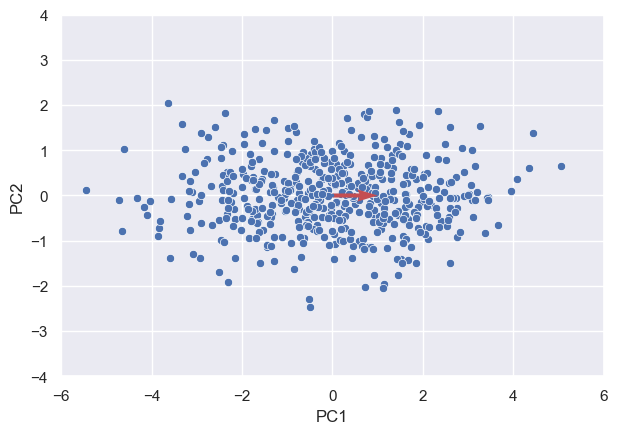

In [30]:
#Plot reduce data 
plt.figure(figsize=(7, 7))

sns.scatterplot(pca_transfomed_df, x='PC1', y='PC2')


plt.xlim([-6, 6])
plt.ylim([-4, 4])


plt.quiver(
    0, 0,
    1,
    0,
    angles='xy', scale_units='xy',
    scale=1, color='r',
    label='PC1 Vector'
)
plt.quiver(
    0, 0,
    0,
    0,
    angles='xy', scale_units='xy',
    scale=1, color='b',
    label='PC2 Vector'
)

plt.gca().set_aspect('equal', adjustable='box')
#plt.legend()
#plt.title('PC1 and PC2 in original coordinates system')